y = 0.0674436090225565x + 117.39428571428572


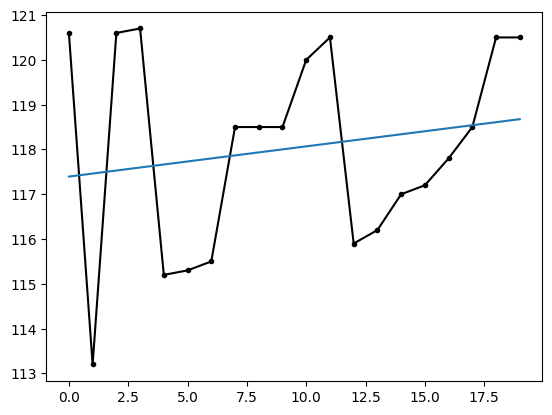

In [7]:
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns

def linear_trend(x: list, y: list):
    yavg = st.mean(y)
    xavg = st.mean(x)
    chisl = 0
    for i in range(len(x)):
        chisl += (y[i]-yavg)*(x[i]-xavg)
    znam = 0
    for i in range(len(x)):
        znam+=(x[i]-xavg)**2
    beta = chisl/znam
    alpha = yavg-beta*xavg
    return (alpha,beta)



#x = [225, 235, 325, 421, 448, 425, 469, 549, 565, 513, 555, 634, 641, 551, 602, 676,
     #801, 901, 1102, 1373, 1447, 1527, 1697, 2038, 2044, 1922, 2120, 2536, 2461, 2268,
     #2523, 3074, 2998, 2893.1]
x = [120.6, 113.2,  120.6, 120.7, 115.2, 115.3, 115.5,  118.5, 118.5,
     118.5, 120, 120.5, 115.9, 116.2, 117, 117.2, 117.8, 118.5, 120.5, 120.5]

y = [i for i in range(len(x))]

b,a=linear_trend(y,x)
print("y = ",a,"x + ",b,sep="")
#a=1

plt.plot([i for i in range(len(x))], x, "k-",
         [i for i in range(len(x))],x, "k.")
#sns.lineplot(x=[i for i in range(110,120)],y=[a*x1+b for x1 in range(0,10)])
ytrend=[a*x + b for x in range(len(x))]
sns.lineplot(x=[x for x in range(len(x))], y=ytrend)
plt.show()



# Оценка адекватности 

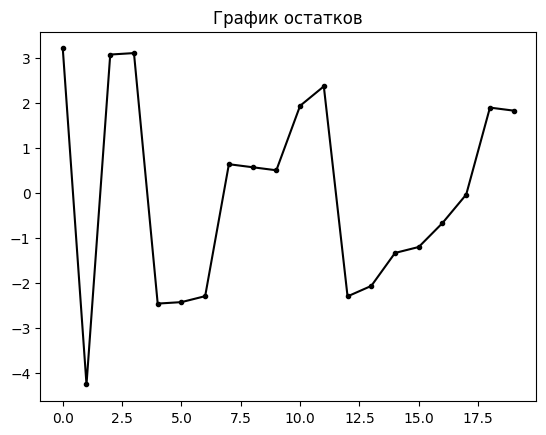

критическое количество поворотных точек = 8
Количество поворотных точек = 8
Остатки не случайные => модель не адекватна
d = 1.8707609611433127
остатки признаются некоррелированными => модель адекватна
RS = 3.334970314228563
Остатки нормально распределенные => модель адекватна


In [31]:
from math import sqrt


def e(x: list, yt: list):  # остатки
    e = []
    for i in range(len(x)):
        e.append(x[i]-yt[i])
    return e


def p(x: list):  # количество поворотных точек для остаткоd
    count = 0
    for i in range(1, len(x)-1):
        if ((x[i-1] > x[i] and x[i] < x[i+1]) or (x[i-1] < x[i] and x[i] > x[i+1])):
            count += 1
    print("Количество поворотных точек =", count)
    return count


def turning_point_check(x: list):
    n = len(x)
    q = int(2/3*(n-2)-1.96*sqrt((16*n-29)/90))
    print("критическое количество поворотных точек =",q)
    if (p(x) > q):
        return True
    else:
        return False


def d(et: list):
    chisl = 0
    znam = 0
    for i in range(1, len(et)):
        chisl += (et[i]-et[i-1])**2
    for i in range(len(et)):
        znam += et[i]**2
    return chisl/znam


def coefautocorr(et:list):
    chisl=0
    znam=0
    for i in range(1,len(et)):
        chisl+=et[i]*et[i-1]
    for i in range(len(et)):
        znam+=et[i]**2

def ford(d: float,et:list):
    d1 = 1.2
    d2 = 1.41
    if (d2 < d < (4-d2)):
        print("остатки признаются некоррелированными => модель адекватна")
        return True
    elif (0 < d < d1):
        print("имеется положительная автокорреляция остатков => модель не адекватна")
        return False
    elif (d1 < d < d2 or (4-d2) < d < (4-d1)):
        print("yеопределенность ситуации, рассчитаем коэффициент автокорреляции первого порядка")
        rcrit=0.299
        if(abs(coefautocorr(et))<=rcrit):
            print("остатки признаются некоррелированными => модель адекватна")
            return True
        elif (abs(coefautocorr(et))>0):
             print("имеется положительная автокорреляция остатков => модель не адекватна")
             return False
        elif(abs(coefautocorr(et))<0):
            print("имеется отрицательная автокорреляция остатков => модель не адекватна")
            return False


def stotklon(et:list):
    t=0
    avg=st.mean(et)
    for i in range(len(et)):
        t+=(et[i]-avg)**2
    s=sqrt(1/(len(et)-1)*t)
    return s
def RS(et:list):
    emax=max(et)
    emin=min(et)
    s=stotklon(et)
    rs=(emax-emin)/s
    rs1=3.18
    rs2=4.32
    return rs

def checkRS(et:list):
    rs1=3.18
    rs2=4.32
    rs=RS(et)
    if(rs1<=rs<=rs2):
        print("Остатки нормально распределенные => модель адекватна")
    else:
        print("Остатки не являются нормально распределенными => модель не адекватна")

x = [120.6, 113.2,  120.6, 120.7, 115.2, 115.3, 115.5,  118.5, 118.5,
     118.5, 120, 120.5, 115.9, 116.2, 117, 117.2, 117.8, 118.5, 120.5, 120.5]

et = e(x, ytrend)
plt.title("График остатков")
plt.plot([i for i in range(len(et))], et, "k-",
         [i for i in range(len(et))], et, "k.")
plt.show()

if turning_point_check(et):
    print("Остатки случайные => модель адекватна")
else:
    print("Остатки не случайные => модель не адекватна")



print("d =", d(et))
ford(d(et),et)


print("RS =",RS(et))

checkRS(et)